In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample


# Load the dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
df = pd.read_csv(url, names=columns)

This dataset contains features extracted from images of genuine and forged banknotes. The goal is to classify whether a banknote is authentic (1) or fake (0) using numerical attributes derived from wavelet analysis (UCI Repository: Banknote Authentication Dataset).

Feature	Description:
- Variance: Variance of the wavelet-transformed image;
- Skewness: Skewness of the wavelet-transformed image;
- Kurtosis: Kurtosis (peakedness) of the wavelet-transformed image;
- Entropy: Entropy of the image;
- Class: 0 = Forged banknote, 1 = Authentic banknote.

Why this dataset?
- Supervised Classification Task (Binary classification: real vs. fake banknotes);
- Small and Fast to Train (1,372 samples, no missing data).

c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\diogo\anaconda3_\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:38:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn

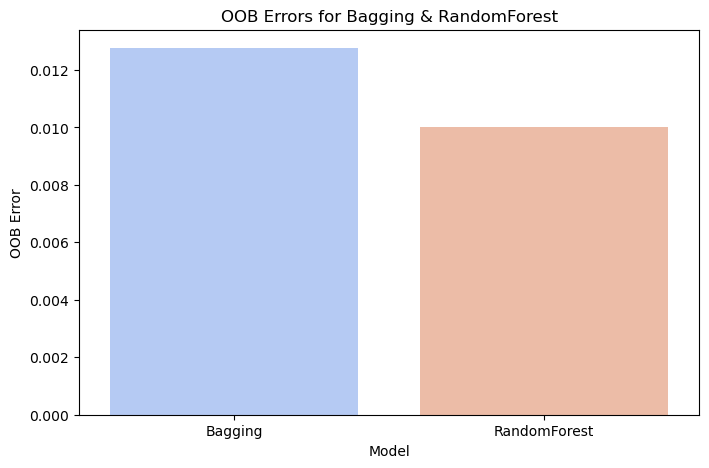

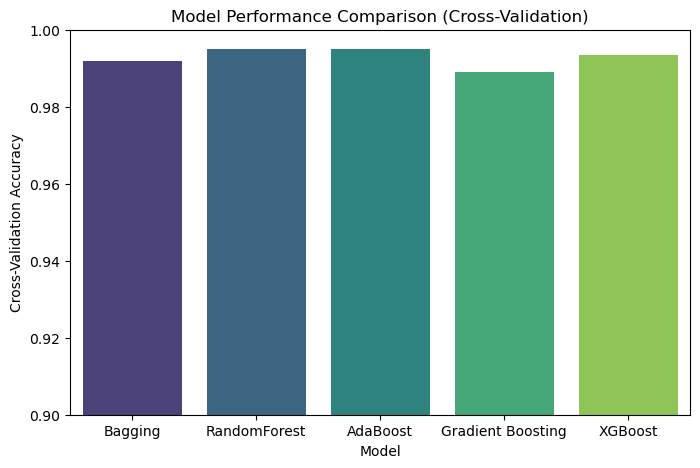


OOB Errors (Lower is better):
Bagging: 0.0128
RandomForest: 0.0100

Cross-Validation Accuracy (Higher is better):
Bagging: 0.9920
RandomForest: 0.9949
AdaBoost: 0.9949
Gradient Boosting: 0.9891
XGBoost: 0.9934


In [7]:
# Split into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, oob_score=True, random_state=42)
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit models
bagging.fit(X_train, y_train)
rf.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# OOB Errors
oob_errors = {
    "Bagging": 1 - bagging.oob_score_,
    "RandomForest": 1 - rf.oob_score_
}

# Cross-validation accuracy
models = {"Bagging": bagging, "RandomForest": rf, "AdaBoost": adaboost, "Gradient Boosting": gb, "XGBoost": xgb}
cv_scores = {name: np.mean(cross_val_score(model, X, y, cv=5)) for name, model in models.items()}

# Plot OOB errors
plt.figure(figsize=(8,5))
sns.barplot(x=list(oob_errors.keys()), y=list(oob_errors.values()), palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("OOB Error")
plt.title("OOB Errors for Bagging & RandomForest")
plt.show()

# Plot Cross-validation results
plt.figure(figsize=(8,5))
sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette="viridis")
plt.xlabel("Model")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Model Performance Comparison (Cross-Validation)")
plt.ylim(0.9, 1)
plt.show()

# Print results
print("\nOOB Errors (Lower is better):")
for model, error in oob_errors.items():
    print(f"{model}: {error:.4f}")

print("\nCross-Validation Accuracy (Higher is better):")
for model, score in cv_scores.items():
    print(f"{model}: {score:.4f}")

Regarding the Out-of-Bag (OOB) error, which only Bagging and Random Forests provide (and once a lower OOB error is better), Random Forest has a slight advantage over Bagging. This suggests that Random Forest generalizes better, probably because it uses feature randomness, reducing overfitting.

Considering the cross-validation accuracy, Random Forest and AdaBoost performed best (99.49%) and are the two best models for this dataset, namely Random Forest, that outperformed both metrics.

Now, analyzing the metrics for different number of trees:

c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\diogo\anaconda3_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: Th

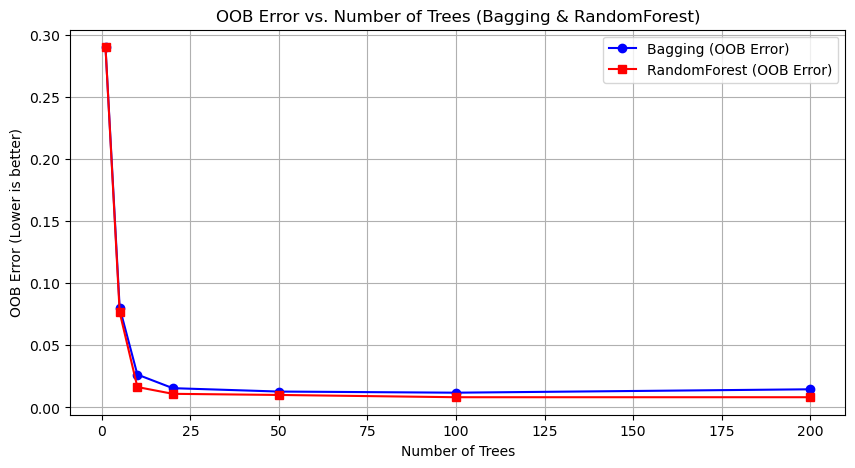

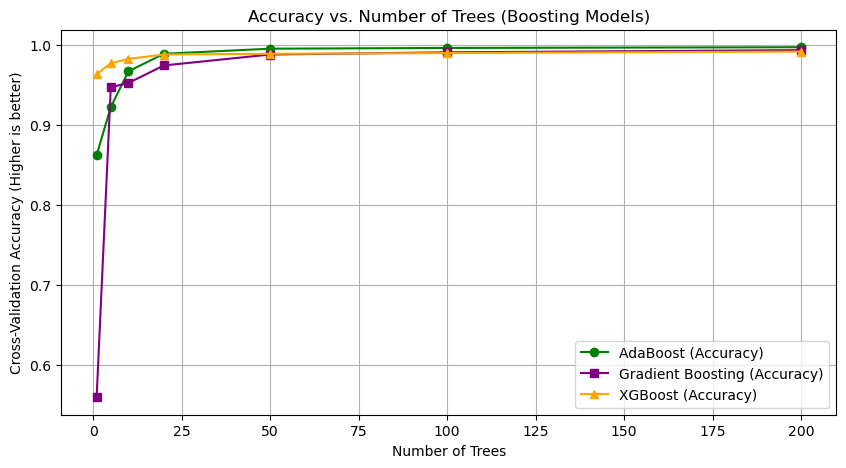

In [ ]:
# Range of trees to test
n_trees = [1, 5, 10, 20, 50, 100, 200]

# Store results
oob_errors_bagging = []
oob_errors_rf = []
cv_scores_adaboost = []
cv_scores_gb = []
cv_scores_xgb = []

# Iterate over different number of trees
for n in n_trees:
    # Bagging with OOB
    bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n, oob_score=True, random_state=42)
    bagging.fit(X_train, y_train)
    oob_errors_bagging.append(1 - bagging.oob_score_)

    # Random Forest with OOB
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_errors_rf.append(1 - rf.oob_score_)

    # Boosting models (Use Cross-Validation instead of OOB)
    adaboost = AdaBoostClassifier(n_estimators=n, random_state=42)
    cv_scores_adaboost.append(np.mean(cross_val_score(adaboost, X_train, y_train, cv=5)))

    gb = GradientBoostingClassifier(n_estimators=n, random_state=42)
    cv_scores_gb.append(np.mean(cross_val_score(gb, X_train, y_train, cv=5)))

    xgb = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='logloss', random_state=42)
    cv_scores_xgb.append(np.mean(cross_val_score(xgb, X_train, y_train, cv=5)))

# Plot OOB Error for Bagging & RandomForest
plt.figure(figsize=(10,5))
plt.plot(n_trees, oob_errors_bagging, marker='o', linestyle='-', label="Bagging (OOB Error)", color='blue')
plt.plot(n_trees, oob_errors_rf, marker='s', linestyle='-', label="RandomForest (OOB Error)", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error (Lower is better)")
plt.title("OOB Error vs. Number of Trees (Bagging & RandomForest)")
plt.legend()
plt.grid()
plt.show()

# Plot Cross-Validation Accuracy for Boosting Models
plt.figure(figsize=(10,5))
plt.plot(n_trees, cv_scores_adaboost, marker='o', linestyle='-', label="AdaBoost (Accuracy)", color='green')
plt.plot(n_trees, cv_scores_gb, marker='s', linestyle='-', label="Gradient Boosting (Accuracy)", color='purple')
plt.plot(n_trees, cv_scores_xgb, marker='^', linestyle='-', label="XGBoost (Accuracy)", color='orange')
plt.xlabel("Number of Trees")
plt.ylabel("Cross-Validation Accuracy (Higher is better)")
plt.title("Accuracy vs. Number of Trees (Boosting Models)")
plt.legend()
plt.grid()
plt.show()


The OOB error rapidly decreases as the number of trees increases and stabilizes. For small values (e.g., n=1, 5, 10), both methods have relatively high OOB error but drop significantly beyond 20 trees. After n=50, the improvement becomes marginal, showing diminishing returns with additional trees.
Random Forest achieves a slightly lower OOB error than Bagging, which is expected since Random Forest performs feature selection, leading to less correlation among trees.


Accuracy improves quickly as the number of trees increases, then levels off.
Gradient Boosting starts with the lowest accuracy among the models but rapidly catches up. XGBoost converges the fastest, likely due to its optimized boosting strategy and regularization. AdaBoost reaches high accuracy early and stabilizes like XGBoost.
All models achieve near-perfect accuracy with 100 or more trees (~1.0). XGBoost may be the best choice if computational efficiency is a priority due to its fast convergence.